# Исследование надёжности заёмщиков
**Цель работы: оценить влияние семейного положения и количества детей клиентов банка на факт погашения кредита в срок** 
<a class="tocSkip">

# <a name="contents">Задачи исследования</a>
## [1.Ознакомление с данными](#stage_1)
## [2. Предобработка данных:](#stage_2)
- выводы по столбцам
- поиск аномалий
- изменение типов данных
- удаление дубликатов
- лемматизация целей кредита
- категоризация данных
## [3. Поиск зависимостей:](#stage_3)
- между наличием детей и возвратом кредита в срок
- между семейным положением и возвратом кредита в срок
- между уровнем дохода и возвратом кредита в срок
- между целями кредита и возврат его в срок
## [4. Формирование общего вывода](#stage_4)

<a name="stage_1"></a>
## Этап 1. Ознакомление с данными
В качестве исходных данных выступает .csv файл. Создадим переменную `data` и присвоим ей прочитанный файл. Выведем датафрейм на экран и оценим объём предоставленных данных

[Наверх к оглавлению](#contents)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')

from pymystem3 import Mystem
m = Mystem() 
from collections import Counter

In [4]:
data = pd.read_csv(r'F:\Макс 2023\Аналитика данных\Аналитик данных [Яндекс практикум] [1 часть]\[SW.BAND] 08_Проектная работа\data.csv')

In [158]:
data

,number_of_children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,non_repayment_debt,total_income,purpose
0,1,-8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,операции с недвижимостью
1,1,-4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,покупка автомобиля
2,0,-5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,операции с недвижимостью
3,3,-4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с недвижимостью
21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,покупка автомобиля
21522,1,-2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,операции с недвижимостью
21523,3,-3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,покупка автомобиля


### Выводы
Датафрейм состоит из 21525 строк и 12 столбцов. Большинство столбцов имеют понятное название. Сразу бросается в глаза отрицательный трудовой стаж в вещественном типе данных. Далее приступим к подробному анализу всех столбцов

<a name="stage_2"></a>
## Этап 2. Предобработка данных

[Наверх к оглавлению](#contents)

### 2.1 Выявление пропусков данных и аномалий
Начнем с просмотра общей информации о датафрейме. Проанализируем имеющиеся столбцы. Оценим количество пропущенных значений и тип данных столбцов. Сделаем предварительные выводы

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [6]:
data.groupby('children')['children'].count()

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64

In [5]:
# Подсчет процента отрицательных значений
negative_values = sum(data['days_employed'] < 0) / data['days_employed'].count()
# Подсчет процента пропущенных значений
days_employed_missing = data['days_employed'].isna().sum() / data.shape[0]
print('Процент пропущенных значений столбца "days_employed": {:.1%}'.format(days_employed_missing))
print('Отношение отрицательных значений в столбце "days_employed" к общему числу заполненных строк: {:.1%}'.format(negative_values))

Процент пропущенных значений столбца "days_employed": 10.1%
Отношение отрицательных значений в столбце "days_employed" к общему числу заполненных строк: 82.2%


In [8]:
# Группируем данные, чтобы узнать возраст клиентов и их количество
data.groupby('dob_years')['dob_years'].count()

dob_years
0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [9]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [10]:
data['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [11]:
data['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

In [12]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [13]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [7]:
# Посмотрим на строки total_income с пропущенными значениями
data.loc[data['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [15]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [17]:
data['purpose'].value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
покупка жилья для сдачи                   653
операции с жильем                         653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
строительство недвижимости                620
покупка своего жилья                      620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

### Вывод

Столбец `children` представлен целочисленным типом данных и несет информацию о количестве детей клиента. Пропусков здесь не наблюдается, однако есть небольшое количество отрицательных значений и аномальных, где после постепенного уменьшения многодетных клиентов встречается 76 строк с значением "20".

В столбце `days_employed` указан общий трудовой стаж в днях. Столбец имеет вещественный тип данных, хотя более логичным будет изменить его на целочисленный. Мы видим, что большинство значений отрицательные и слишком большие для трудового стажа клиентов в днях. Подобные значения можно объяснить ошибкой при выгрузке. Отсутствие значений возмножно связано с тем, что клиент официально не трудоустроен. Пропущено 10.1% данных, а 82.2% из оставшихся имеют отрицательное значение.

В столбце `dob_years` указан возраст клиентов. Пропусков и аномалий данных не наблюдается. Предполагается объединение до более крупных возрастных категорий.

В столбце `education` наблюдаеются запись уровня образования в разном регистре, что создает видимость дополнительных категорий. Требуется приведение всех значений в нижний регистр.

Столбец `education_id` не имеет пропусков и представляет собой идентификатор уровня образования со значениями от "0" до "4".

Столбцы `family_status` и `family_status_id` показывают семейное положение и его уникальный идентификатор соответственно. Пропусков не наблюдается и прослеживается следующая зависимость: 
* "0" - женат / замужем
* "1" - гражданский брак
* "2" - Не женат / не замужем
* "3" - в разводе
* "4" - вдовец / вдова

Столбец `gender` показывет пол клиента. Помимо 2-ух категорий "F" и "M" есть одна строка со значением "XNA".

Столбец `income_type` показывает тип занятости клиентов. Он не имеет пропусков и имеет понятную и емкую категоризацию.

В столбце `debt` указано имел ли клиент задолженность по возврату кредитов. Значения представлены значениями "0" и "1", означающие "нет" и "да" соответственно.

В столбце `total_income` показана информация о ежемесячном доходе клиентов. Как и в столбце `days_employed`, здесь пропущено 10.1%  данных по тем же строкам. Эти пропуски коррелируют с отсутствием трудового стажа, а так как предполагается, что клиент официально не  трудоустроен, то и информация о доходах также отсутствует. Предполагается, что доход представлен в рублях. Для исследований целесообразнее изменить тип данных на целочисленный.

В столбце `purpose` хранится информация о целях кредита. Пропусков и аномалий не обнаружено. Фактически из 38 уникальных целей имеется несколько основных, которые интерпретируются по-разному. Предполагается посредством лемматизации привести данный столбец к общим категориям.

### Шаг 2.2 Заполнение пропусков
Заменим значения в столбцах `days_employed` и `total_income`

In [18]:
# Заменим пропуски на нули
data['days_employed'] = data['days_employed'].fillna(value=0)
data['total_income'] = data['total_income'].fillna(value=0)

### Вывод

Подставлять средние или медианные значения некорректно.
Это повысит шанс получения кредита, но не повысит качество данных

### Шаг 2.3 Изменение типа данных. Удаление дубликатов
Изменим названия столбцов с информацией о количестве детей и статусе возврата долга на более корректные названия.

Изменим в столбцах `days_employed` и `total_income` тип данных на целочисленный. В первом случае число должно обозначать количество дней трудового стажа и не должно быть вещественным. Во втором же случае ограничимся уровнем дохода округленным до рублей, т.к. это наиболее оптимальный вариант для сравнения доходов.

Найдем дублирующие строки в таблице. Так как отсутствует id клиентов и даты обращений, то поиск дубликатов будем производить по сравнению всей строки. Учитывая, что столбцы с информацией о трудовом стаже и уровню дохода имеют наибольшее количество уникальных значений, то, в совокупностью с остальными столбцами, удаление полезных данных маловероятно.

Также приведем столбец с уровнем образования к нижнему регистру, т.к. на данный момент эти значения являются неявными дубликатами. Их дальнейшее исследование в таком виде будет некорректным.

In [19]:
# Получим список текущих названий столбцов
data.columns.tolist()

['children',
 'days_employed',
 'dob_years',
 'education',
 'education_id',
 'family_status',
 'family_status_id',
 'gender',
 'income_type',
 'debt',
 'total_income',
 'purpose']

In [20]:
new_col = ['number_of_children',
 'days_employed',
 'dob_years',
 'education',
 'education_id',
 'family_status',
 'family_status_id',
 'gender',
 'income_type',
 'non_repayment_debt',
 'total_income',
 'purpose']

In [21]:
# Присваиваем новые названия столбцов
data.set_axis(new_col, axis='columns', inplace=True)

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_18864\1237745848.py:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(new_col, axis='columns', inplace=True)


In [22]:
# В обоих столбцах изменяем тип данных на целочисленный
data['days_employed'] = data['days_employed'].astype(int)
data['total_income'] = data['total_income'].astype(int)

In [23]:
print(f'Количества дубликатов: {data.duplicated().sum()}')
print('Процент дубликатов от общего размера данных: {:.2%}'.format(data.duplicated().sum()/data.shape[0]))

Количества дубликатов: 54
Процент дубликатов от общего размера данных: 0.25%


In [24]:
# Перед удаление посмотрим на дублирующие данные
data.loc[data.duplicated()]

,number_of_children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,non_repayment_debt,total_income,purpose
2849,0,0,41,среднее,1,женат / замужем,0,F,сотрудник,0,0,покупка жилья для семьи
4182,1,0,34,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,0,свадьба
4851,0,0,60,среднее,1,гражданский брак,1,F,пенсионер,0,0,свадьба
5557,0,0,58,среднее,1,гражданский брак,1,F,пенсионер,0,0,сыграть свадьбу
7808,0,0,57,среднее,1,гражданский брак,1,F,пенсионер,0,0,на проведение свадьбы
8583,0,0,58,высшее,0,Не женат / не замужем,4,F,пенсионер,0,0,дополнительное образование
9238,2,0,34,среднее,1,женат / замужем,0,F,сотрудник,0,0,покупка жилья для сдачи
9528,0,0,66,среднее,1,вдовец / вдова,2,F,пенсионер,0,0,операции со своей недвижимостью
9627,0,0,56,среднее,1,женат / замужем,0,F,пенсионер,0,0,операции со своей недвижимостью
10462,0,0,62,среднее,1,женат / замужем,0,F,пенсионер,0,0,покупка коммерческой недвижимости


In [25]:
# Удаляем дубликаты и проверяем
data = data.drop_duplicates()
data.duplicated().sum()

0

In [27]:
data['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [29]:
# Приводим весь столбец к нижнему регистру
data['education'] = data['education'].str.lower()

In [30]:
# Проверяем новые значения
data['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

### Вывод

Названия столбцов с количеством детей и статусе невозврата кредита переименованы в более понятные названия - `number_of_children` и `non_repayment_debt` соответственно. Дублирующих строк в датафрейме - 54, что сотавляет порядка 0.25% от общего количество и не повлияет на выводы. Просмотрев дублирующие строки становится ясно, что они появились вследствие отсутствия данных о трудовом стаже и уровне дохода.

Также мы избавились от неявного дублирования в столбце с уровнем образования. Теперь каждый уровень соответствует своему id соответствующего столбца с названиями.

### Шаг 2.4 Исследование аномалий в данных
При анализе каждого столбца нам удалось обнаружить аномалии в столбце с трудовым стажем, где большинство значений отрицательные, и количестве детей, где есть небольшое количество отрицательных значений. Также есть строки, где возраст клиента равняется 0.

In [160]:
data['number_of_children'].value_counts()

 0     14107
 1      4809
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: number_of_children, dtype: int64

In [169]:
# Посмотрим на данные, где указан "-1" ребенок
child_1 = data.loc[data['number_of_children']==-1]
print('Средний возраст клиентов с "-1" ребенком :', child_1['dob_years'].mean())
print('Медианный возраст клиентов с "-1" ребенком :', child_1['dob_years'].median())

Средний возраст клиентов с "-1" ребенком : 42.57446808510638
Медианный возраст клиентов с "-1" ребенком : 41.0


In [171]:
# Посмотрим на данные, где указано "20" детей
child_20 = data.loc[data['number_of_children']==20]
child_20

,number_of_children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,non_repayment_debt,total_income,purpose
606,20,-880,21,среднее,1,женат / замужем,0,M,компаньон,0,145334,операции с недвижимостью
720,20,-855,44,среднее,1,женат / замужем,0,F,компаньон,0,112998,операции с недвижимостью
1074,20,-3310,56,среднее,1,женат / замужем,0,F,сотрудник,1,229518,получение образования
2510,20,-2714,59,высшее,0,вдовец / вдова,2,F,сотрудник,0,264474,операции с недвижимостью
2941,20,-2161,0,среднее,1,женат / замужем,0,F,сотрудник,0,199739,покупка автомобиля
...,...,...,...,...,...,...,...,...,...,...,...,...
21008,20,-1240,40,среднее,1,женат / замужем,0,F,сотрудник,1,133524,покупка автомобиля
21325,20,-601,37,среднее,1,женат / замужем,0,F,компаньон,0,102986,получение образования
21390,20,0,53,среднее,1,женат / замужем,0,M,компаньон,0,0,операции с недвижимостью
21404,20,-494,52,среднее,1,женат / замужем,0,M,компаньон,0,156629,операции с недвижимостью


In [174]:
# Заменим отрицательное число на положительное, а с "20" изменим на "2"
data.loc[data['number_of_children']==-1, 'number_of_children'] = 1
data.loc[data['number_of_children']==20, 'number_of_children'] = 2

In [175]:
# Проверим замену
data['number_of_children'].value_counts()

0    14107
1     4856
2     2128
3      330
4       41
5        9
Name: number_of_children, dtype: int64

In [181]:
# Все отрицательные значения трудового стажа изменим на положительные
data.loc[data['days_employed'] < 0, 'days_employed'] = abs(data['days_employed'])

In [182]:
data.head()

,number_of_children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,non_repayment_debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,покупка автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,проведение свадьбы


In [183]:
# Посмотрим на средние и медианные значения стажа
data['days_employed'].describe()

count     21471.000000
mean      60307.263611
std      133489.332460
min           0.000000
25%         620.000000
50%        1818.000000
75%        4794.000000
max      401755.000000
Name: days_employed, dtype: float64

In [201]:
# Отношение содержания аномальных данных к общему количеству
print('Процент аномальных данных: {:.2%}'.format(data.loc[data['days_employed'] >=17155, 'days_employed'].count() / data.shape[0]))

Процент аномальных данных: 16.05%


In [196]:
# создадим переменную для построения нормалльного распределения
x = data.loc[data['days_employed'] <=17155, 'days_employed']

0        8437
1        4024
2        5623
3        4124
5         926
         ... 
21519    2351
21520    4529
21522    2113
21523    3112
21524    1984
Name: days_employed, Length: 18024, dtype: int32

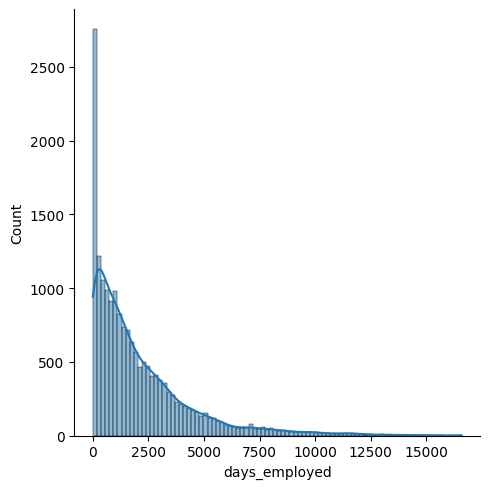

In [197]:
# Рассмотрим распределение трудового стажа клиентов
sns.displot(x, kde=True)

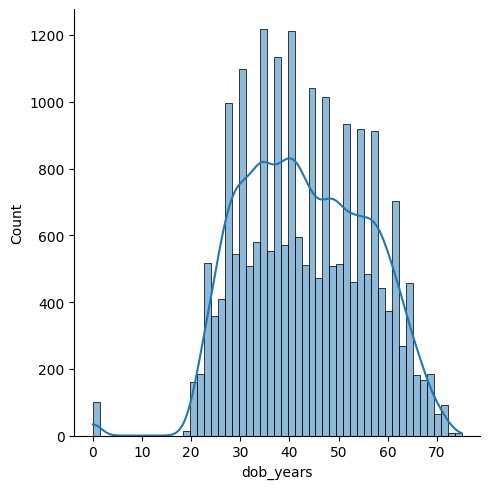

In [202]:
# Рассмотрим распределение возраста клиентов
sns.displot(data.loc[data['dob_years'] >= 0, 'dob_years'], kde=True)

In [10]:
data.loc[data['dob_years'] == 0, 'dob_years'].count()

101

### Выводы
Количество детей клиентов со значением "-1" было заменено на положительное число, т.к. средний и медианный возраст клиентов с данной аномалией составляет 42.6 и 41 год соответственно, так что подразумевается наличие ребенка. В значении "20" предполагается ошибка (добавочный ноль), т.к. после 2-го ребенка идет постепенное снижение количество клиентов до 9 человек (5 детей) и между 5 и 20 нет промежуточных значений.

Возраст клиентов приближен к нормальному распределению, однако в 101 строке это значение равняется нулю. Скорее всего эта информация не была занесена в базу. Для изучения зависимостей связанных с возрастом эти значения будут отброшены.

Информация о трудовом стаже представляет собой наиболее проблемные данные. Даже после изменения значений по модулю наблюдается 16.05% данных превышающих максимально возможный трудовой стаж. В качестве границы рассматривается вариант, если клиент работал с 18 до 65 лет, т.е. его рабочий стаж в составляет 17155 дней.

### Шаг 2.5 Обобщение категорий для цели кредита
На этапе поиска аномалий в данных было выявлено, что столбец с целями кредита содержит большое количество уникальных целей, которые зачастую повторяются за счет разного написания. Проведем лемматизацию и выберем слова, по которым будем объединять их в более крупные категории. 

In [15]:
purpose_unique = data['purpose'].unique()

In [16]:
purpose_unique

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [13]:
# Перебираем все уникальные цели кредита и производим подсчет лемм
def lemma_t(text):
    for word in text:
        lemmas = m.lemmatize(word)
        print(lemmas)
        lemma_list.extend(lemmas)

In [17]:
lemma_list = []
lemma_t(purpose_unique)

['покупка', ' ', 'жилье', '\n']
['приобретение', ' ', 'автомобиль', '\n']
['дополнительный', ' ', 'образование', '\n']
['сыграть', ' ', 'свадьба', '\n']
['операция', ' ', 'с', ' ', 'жилье', '\n']
['образование', '\n']
['на', ' ', 'проведение', ' ', 'свадьба', '\n']
['покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', '\n']
['покупка', ' ', 'недвижимость', '\n']
['покупка', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['покупка', ' ', 'жилой', ' ', 'недвижимость', '\n']
['строительство', ' ', 'собственный', ' ', 'недвижимость', '\n']
['недвижимость', '\n']
['строительство', ' ', 'недвижимость', '\n']
['на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', '\n']
['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n']
['операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', '\n']
['строительство', ' ', 'жилой', ' ', 'недвижимость', '\n']
['жилье', '\n']
['операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', '\n']
['автомобиль', '\n']
['заниматься', ' ', 'образование'

In [18]:
# Посчитаем насколько часто повторяются леммы
Counter(lemma_list)

Counter({'покупка': 10,
         ' ': 59,
         'жилье': 7,
         '\n': 38,
         'приобретение': 1,
         'автомобиль': 9,
         'дополнительный': 2,
         'образование': 9,
         'сыграть': 1,
         'свадьба': 3,
         'операция': 4,
         'с': 5,
         'на': 4,
         'проведение': 1,
         'для': 2,
         'семья': 1,
         'недвижимость': 10,
         'коммерческий': 2,
         'жилой': 2,
         'строительство': 3,
         'собственный': 1,
         'подержать': 1,
         'свой': 4,
         'со': 1,
         'заниматься': 2,
         'сделка': 2,
         'подержанный': 1,
         'получение': 3,
         'высокий': 3,
         'профильный': 1,
         'сдача': 1,
         'ремонт': 1})

In [21]:
# Напишем код, который создаст словарь с исходными названиями целей кредита в качестве ключа
# В качестве значений выступает одна из 4-ех крупных категорий
purpose_dict = {}
for word in purpose_unique:
    if word in purpose_dict:
        continue
    else:
        if 'свадь' in word:
            purpose_dict[word] = 'проведение свадьбы'
        elif 'недвиж' in word or 'жил' in word:
            purpose_dict[word] = 'операции с недвижимостью'
        elif 'автомоб' in word:
            purpose_dict[word] = 'покупка автомобиля'
        elif 'образов' in word:
            purpose_dict[word] = 'получение образования'
        else:
            print(f'для элемента "{word}" не удалось определить категорию')

In [92]:
purpose_dict

{'покупка жилья': 'операции с недвижимостью',
 'приобретение автомобиля': 'покупка автомобиля',
 'дополнительное образование': 'получение образования',
 'сыграть свадьбу': 'проведение свадьбы',
 'операции с жильем': 'операции с недвижимостью',
 'образование': 'получение образования',
 'на проведение свадьбы': 'проведение свадьбы',
 'покупка жилья для семьи': 'операции с недвижимостью',
 'покупка недвижимости': 'операции с недвижимостью',
 'покупка коммерческой недвижимости': 'операции с недвижимостью',
 'покупка жилой недвижимости': 'операции с недвижимостью',
 'строительство собственной недвижимости': 'операции с недвижимостью',
 'недвижимость': 'операции с недвижимостью',
 'строительство недвижимости': 'операции с недвижимостью',
 'на покупку подержанного автомобиля': 'покупка автомобиля',
 'на покупку своего автомобиля': 'покупка автомобиля',
 'операции с коммерческой недвижимостью': 'операции с недвижимостью',
 'строительство жилой недвижимости': 'операции с недвижимостью',
 'жилье

In [93]:
# Заменяем исходные категории на более общие, используя созданный словарь purpose_dict
data['purpose'] = data['purpose'].map(purpose_dict)

In [97]:
# Убедимся, что остались только обобщенные категории
data['purpose'].value_counts()

операции с недвижимостью    10814
покупка автомобиля           4308
получение образования        4014
проведение свадьбы           2335
Name: purpose, dtype: int64

### Вывод
Нам удалось выделить из целей кредита 4 обобщенных категории:
* операции с недвижимостью  
* покупка автомобиля           
* получение образования       
* проведение свадьбы 

С помощью лемматизации нам удалось выделить наиболее часто встречающиеся слова. Мы написали код для создания словаря и с помощью функции `map()` обобщили все категории в датафрейме

<a name="stage_3"></a>
## Этап 3. Поиск зависимостей
### Шаг 3.1. Зависимость между наличием детей и возвратом кредита в срок

[Наверх к оглавлению](#contents)

In [206]:
data.head()

,number_of_children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,non_repayment_debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,покупка автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,проведение свадьбы


In [207]:
# Группируем по столбцу с количеством детей и считаем количество невыплаченных кредитов и общее количество клиентов в категории
repayment_ratio = data.groupby('number_of_children').agg({'non_repayment_debt': ['sum', 'count']})
repayment_ratio

non_repayment_debt       
                                  sum  count
number_of_children                          
0                                1063  14107
1                                 445   4856
2                                 202   2128
3                                  27    330
4                                   4     41
5                                   0      9

In [208]:
# Находим отношение количества задолженностей к общему количеству
repayment_ratio['ratio'] = repayment_ratio['non_repayment_debt']['sum'] / repayment_ratio['non_repayment_debt']['count'] * 100

In [209]:
repayment_ratio.reset_index()

number_of_children non_repayment_debt            ratio
                                    sum  count          
0                  0               1063  14107  7.535266
1                  1                445   4856  9.163921
2                  2                202   2128  9.492481
3                  3                 27    330  8.181818
4                  4                  4     41  9.756098
5                  5                  0      9  0.000000

### Вывод
Наименьший процент кредитов, которые не вернули в срок, у клиентов с 5 детьми, однако их не стоит рассматривать отдельной группой, так как их количество от общей выборки составляет менее 0.05%. В расчет идут клиенты без детей - 7.54%, что является минимальным значением среди рассматриваемых категорий. Наибольшее значение у клиентов с 4-мя детьми - 9.76%, однако количество таких клиентов тоже невелико. Можно сделать вывод, что наиболее нежелательны кредиты для клиентов с 2-мя детьми, где этот процент стремится к 10%.

### Шаг 3.2. Зависимость семейным положением и возвратом кредита в срок

In [211]:
family_status_ratio = data.groupby('family_status').agg({'non_repayment_debt':['sum', 'count']})
family_status_ratio

non_repayment_debt       
                                     sum  count
family_status                                  
Не женат / не замужем                274   2810
в разводе                             85   1195
вдовец / вдова                        63    959
гражданский брак                     388   4163
женат / замужем                      931  12344

In [257]:
family_status_ratio['ratio'] = family_status_ratio ['non_repayment_debt']['sum'] / family_status_ratio ['non_repayment_debt']['count'] * 100

In [258]:
family_status_ratio.reset_index()

family_status non_repayment_debt            ratio
                                        sum  count          
0  Не женат / не замужем                274   2810  9.750890
1              в разводе                 85   1195  7.112971
2         вдовец / вдова                 63    959  6.569343
3       гражданский брак                388   4163  9.320202
4        женат / замужем                931  12344  7.542126

### Вывод
Рассматривая взаимосвязь семейного положения и возврат кредита в срок, можно сделать вывод, что наиболее стабильные в этом плане являются вдовцы/вдовы, а также клинты в разводе, где проценты невыплаченных кредитов минимальны и составляют 6.57% и 7.11% соответственно. Наиболее рискованно выдавать кредиты клиентам с положением "Не женат / не замужем", где он доходит почти до 10%. 

### Шаг 3.3.  Зависимость между уровнем дохода и возвратом кредита в срок

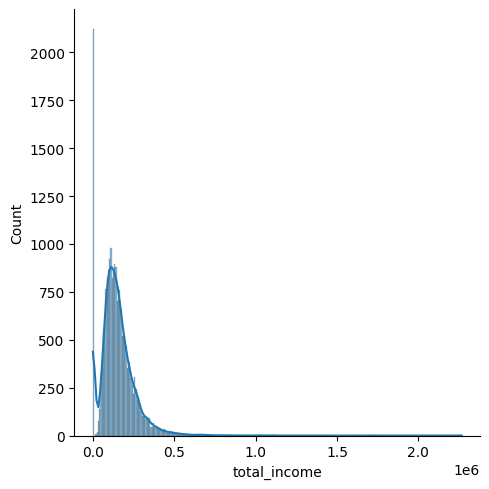

In [256]:
# Посмотрим на распределение уровня доходов и выявим аномалии
sns.displot(data.loc[data['total_income'] >= 0, 'total_income'], kde=True)

In [250]:
# Разобьем всех клиентов на 4 основные категории. Категорию без информации о доходе вынесем отдельно
data.loc[(data['total_income'] < 600000) & (data['total_income'] > 0), 'total_income'].quantile([0.25,0.5,0.75])

0.25    102816.00
0.50    144533.00
0.75    202263.75
Name: total_income, dtype: float64

In [270]:
def income_status(income):
    if income == 0:
        return 'Нет информации о доходе'
    if income <= 102816.0:
            return 'Низкий уровень дохода'
    if income <= 144533.0:
            return 'Средний уровень дохода'
    if income <= 202263.75:
            return 'Высокий уровень дохода'    
    return 'Сверхвысокий уровень дохода'

In [271]:
# создадим отдельный столбец с делением на 6 категорий
data['income_status'] = data['total_income'].apply(income_status)

In [272]:
income_ratio = data.groupby('income_status').agg({'non_repayment_debt': ['sum', 'count']})
income_ratio

non_repayment_debt      
                                           sum count
income_status                                       
Высокий уровень дохода                     425  4809
Нет информации о доходе                    170  2120
Низкий уровень дохода                      381  4813
Сверхвысокий уровень дохода                347  4920
Средний уровень дохода                     418  4809

In [273]:
income_ratio['ratio'] = income_ratio['non_repayment_debt']['sum'] / income_ratio['non_repayment_debt']['count'] * 100
income_ratio.reset_index()

income_status non_repayment_debt           ratio
                                              sum count          
0       Высокий уровень дохода                425  4809  8.837596
1      Нет информации о доходе                170  2120  8.018868
2        Низкий уровень дохода                381  4813  7.916061
3  Сверхвысокий уровень дохода                347  4920  7.052846
4       Средний уровень дохода                418  4809  8.692036

In [274]:
# Вариант со сводной таблицей и представлением количества клиентов отдельно по статусу возврата кредита 
income_pivot = data.pivot_table(index='income_status', columns='non_repayment_debt', values='purpose', aggfunc='count')
income_pivot

non_repayment_debt,0,1
income_status,,
Высокий уровень дохода,4384,425
Нет информации о доходе,1950,170
Низкий уровень дохода,4432,381
Сверхвысокий уровень дохода,4573,347
Средний уровень дохода,4391,418


### Выводы
После построения графика нормального распределния для уровня дохода клиентов банка было замечено, что в данных более 2000 клиентов, у которых нет информации о доходах. Было решено вынести их в отдельную категорию, т.к. здесь около 10% данных, что может повлиять на медианные значения. Также наблюдаем справа от нормального распределения длинный хвост, начинающийся после преодоления уровня дохода порядка 600000 руб. Таким образом рассматриваем 4 категории уровня дохода, которые соответствую диапазонам 4 квантилей медианных значений в промежутке от 0 не включительно до 600000 руб.

После построения итогового датафрейма можно сделать выводы, что наиболее кредитоспособные клиенты со сверхвысоким и низким уровнем дохода, у которых самый низкий процент незакрытых долгов - 7.05% и 7.92% соответственно. У клиентов с высоким уровнем дохода хучший показатель - 8.84%, что практически на 2% выше минимального значения. 

### Шаг 3.4. Зависимость между целями кредита и возврат его в срок

In [215]:
# Группируем по заранее подготовленным категориям целей кредита
purpose_ratio = data.groupby('purpose').agg({'non_repayment_debt':['sum', 'count']})
purpose_ratio

non_repayment_debt       
                                        sum  count
purpose                                           
операции с недвижимостью                782  10814
покупка автомобиля                      403   4308
получение образования                   370   4014
проведение свадьбы                      186   2335

In [275]:
purpose_ratio['ratio'] = purpose_ratio['non_repayment_debt']['sum'] / purpose_ratio['non_repayment_debt']['count'] * 100

In [276]:
purpose_ratio.reset_index()

purpose non_repayment_debt            ratio
                                           sum  count          
0  операции с недвижимостью                782  10814  7.231367
1        покупка автомобиля                403   4308  9.354689
2     получение образования                370   4014  9.217738
3        проведение свадьбы                186   2335  7.965739

<a name="stage_4"></a>
## 4. Формирование оющего вывода
Из всех целей кредита удалось выявить 4 основные категории: операции с недвижимостью, покупка автомобиля, получение образования и проведение свадьбы. Наиболее безопасным для банка является выдача кредита на недвижимость, где процент невыплаченных кредитов минимален и составляет 7.23%. Это можно объяснить тем, что покупка недвижимости является наиболее осознанным решением. Стоимость недвижимости с каждым годом растёт в отличии, например, от автомобилей, где этот процент является самым большим - 9.35%. Кроме того, автомобиль может пострадать в ДТП или быть угнанным, что может повлиять на выплаты по кредиту за уже несуществующую собственность.

[Наверх к оглавлению](#contents)

## Общий вывод

Во время предобработки данных были сделаны выводы по всем столбцам, найдены и устранены аномалии по значениям количества детей, длительности трудового стажа и возрасту клиентов. Все необходимые столбцы были приведены к корректному типу данных, удалены явные и неявные дубликаты данных. Для столбцов с целями кредитов и уровнем доходов клиентов была проведена дополнительная категоризация данных.

Перейдем к цели проекта: **влияние различных признаков на факт погашения кредита в срок**.

**Зависимость от количества детей**.Наименьший процент кредитов, которые не вернули в срок, у клиентов с 5 детьми, однако их не стоит рассматривать отдельной группой, так как их количество от общей выборки составляет менее 0.05%. В расчет идут клиенты без детей - 7.54%, что является минимальным значением среди рассматриваемых категорий. Наибольшее значение у клиентов с 4-мя детьми - 9.76%, однако количество таких клиентов тоже невелико. Можно сделать вывод, что наиболее нежелательны кредиты для клиентов с 2-мя детьми, где этот процент стремится к 10%.

**Зависимость от семейного положения**. Можно сделать вывод, что наиболее стабильные в этом плане являются вдовцы/вдовы, а также клинты в разводе, где проценты невыплаченных кредитов минимальны и составляют 6.57% и 7.11% соответственно. Наиболее рискованно выдавать кредиты клиентам с положением "Не женат / не замужем", где он доходит почти до 10%.

**Зависимость от уровня доходов**. Делаем вывод, что наиболее кредитоспособные клиенты со сверхвысоким и низким уровнем дохода, у которых самый низкий процент незакрытых долгов - 7.05% и 7.92% соответственно. У клиентов с высоким уровнем дохода хучший показатель - 8.84%, что практически на 2% выше минимального значения.

**Зависимость от целей кредита**.Из всех целей кредита удалось выявить 4 основные категории: операции с недвижимостью, покупка автомобиля, получение образования и проведение свадьбы. Наиболее безопасным для банка является выдача кредита на недвижимость, где процент невыплаченных кредитов минимален и составляет 7.23%. Это можно объяснить тем, что покупка недвижимости является наиболее осознанным решением. Стоимость недвижимости с каждым годом растёт в отличии, например, от автомобилей, где этот процент является самым большим - 9.35%. Кроме того, автомобиль может пострадать в ДТП или быть угнанным, что может повлиять на выплаты по кредиту за уже несуществующую собственность.

### Рекомендации
- Отказаться от подсчета трудового стажа клиентов в днях. Вести учет в годах, как наиболее популярной единице для данного значения. Также необходимо выяснить причину большого количества отрицательных значений в выгрузке.
- Уточнить возраст клиентов, где значения равны нулю.
- Ввести единую форму подачи заявки на кредит, где цели обобщены в общие категории. Более подробное описание, при необходимости сохранять данную информацию, можно вести в другом столбце.